 need 3 models generated using existing data (features and labels):
- Logistic Regression
- Random Forest
- XGB or Neural network

Requirements:
1) Perform data analysis (drop missing features, drop incorrect labels, drop highly correlated features, etc)

2) Generate training Python scripts using sklearn for each model that accepts input data, sanitizes data and outputs model + ROC curve + features importance.

3) Make script generic enough to work with any feature names and count (defined in external text file).

4) Generate Prediction Python script (sklearn) that accepts never seen data (no labels, just features) and uses models above to generate prediction score.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings

warnings.filterwarnings('ignore')

In [2]:
features = pd.read_csv('features.csv')
labels = pd.read_csv('labels.csv')

In [3]:
print(features.columns)
print(features.shape)
features.head()

Index(['key', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
       'feature11', 'feature12', 'feature13', 'feature14', 'feature15',
       'feature16', 'feature17', 'feature18', 'feature19', 'feature20',
       'feature21', 'feature22', 'feature23', 'feature24', 'feature25',
       'feature26', 'feature27', 'feature28', 'feature29', 'feature30',
       'feature31', 'feature32', 'feature33', 'feature34', 'feature35',
       'feature36', 'feature37', 'feature38', 'feature39', 'feature40',
       'feature41', 'feature42', 'feature43', 'feature44', 'feature45',
       'feature46', 'feature47', 'feature48', 'feature49', 'feature50',
       'feature51', 'feature52', 'feature53', 'feature54', 'feature55',
       'feature56', 'feature57', 'feature58', 'feature59', 'feature60',
       'feature61', 'feature62', 'feature63', 'feature64', 'feature65',
       'feature66', 'feature67', 'feature68', 'feature69', 'featur

,key,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature67,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76
0,00ace8f9e8017baf0ab312ccbaf55219794df21c0026b3...,1,1,0,1,0,1,1,1,1,...,1,1,1,1,0,1,1,1,1,0
1,009581729c31afe25bf13920bf11d318673f29d9f79572...,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,0,0
2,0049c493d09714af43ac48086908d05a7a295278a56b85...,1,1,0,1,0,1,1,1,1,...,0,0,1,1,0,0,1,1,1,0
3,007fd1565016ae6c2d2a792550ed935529fead976069b6...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,012be300997eb753869a8492e95ef619c2900db4259755...,0,1,0,0,0,1,0,0,1,...,1,0,0,1,1,0,1,0,0,0


In [4]:
print(labels.shape)
labels.head()

(651441, 2)


,key,label
0,bba27b1fffbecb4f37400ec3368995e39dfabbce614225...,1
1,41d66270e5a2bf2366d0804462f1f8609c5ecd83900f00...,1
2,995ac7bd74a6050bd4d0bcd7a891fd57ef7073ddd00acc...,1
3,afb52fe7c13c652190c118f33f42402733766ae714fd48...,1
4,0aab946153a05d31cd98ffae63bd68a397745a66a03ed6...,1


In [5]:
features.isnull().sum()

key          0
feature1     0
feature2     0
feature3     0
feature4     0
            ..
feature72    0
feature73    0
feature74    0
feature75    0
feature76    0
Length: 77, dtype: int64

In [6]:
labels.isnull().sum()

key      0
label    0
dtype: int64

In [7]:
# find the unique values for all the features and the labels
def unique(dataset):
    print(dataset.columns)
    x = str(input('entre the clumns name for with you want the unique value : '))
    print(f'\n {dataset[x].unique().shape}')
    return dataset[x].unique()

In [65]:
unique(features)

Index(['key', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5',
       'feature6', 'feature7', 'feature8', 'feature9', 'feature10',
       'feature11', 'feature12', 'feature13', 'feature14', 'feature15',
       'feature16', 'feature17', 'feature18', 'feature19', 'feature20',
       'feature21', 'feature22', 'feature23', 'feature24', 'feature25',
       'feature26', 'feature27', 'feature28', 'feature29', 'feature30',
       'feature31', 'feature32', 'feature33', 'feature34', 'feature35',
       'feature36', 'feature37', 'feature38', 'feature39', 'feature40',
       'feature41', 'feature42', 'feature43', 'feature44', 'feature45',
       'feature46', 'feature47', 'feature48', 'feature49', 'feature50',
       'feature51', 'feature52', 'feature53', 'feature54', 'feature55',
       'feature56', 'feature57', 'feature58', 'feature59', 'feature60',
       'feature61', 'feature62', 'feature63', 'feature64', 'feature65',
       'feature66', 'feature67', 'feature68', 'feature69', 'featur

array([1, 0], dtype=int64)

In [78]:
labels.sort_values(by = ['key'], ignore_index=True, inplace=True)

In [75]:
features.sort_values(by = ['key'],ignore_index=True,inplace=True)

** **

**Perform data analysis (drop missing features, drop incorrect labels, drop highly correlated features, etc)**

** **

In [215]:
# creating a variable of 'key' in features and labels

f_key = features.drop_duplicates().key
l_key = labels.key

In [216]:
# sorting variables

f_key = sorted(f_key)
l_key = sorted(l_key)

    checking the labels variable have same value or not

In [217]:
f_key[0]

'000000d77fdee024f61e5941861e02838d2214800ec8e910cee4e5c5ff41e7'

In [218]:
l_key[0]


'000000d77fdee024f61e5941861e02838d2214800ec8e910cee4e5c5ff41e7'

In [187]:
features.dropna(inplace=True)

In [128]:
features.drop_duplicates(inplace=True,ignore_index=True)

In [178]:
features.key.isin(l_key)

0          True
1          True
2         False
3          True
4         False
          ...  
999448     True
999449     True
999450     True
999451     True
999452     True
Name: key, Length: 999453, dtype: bool

In [208]:
features_labels = features.drop(features[~(features.key.isin(l_key))],axis='columns')

In [209]:
features_labels = pd.concat([features,labels.label],axis='columns')

In [223]:
features_labels.isnull().sum()

key          0
feature1     0
feature2     0
feature3     0
feature4     0
            ..
feature73    0
feature74    0
feature75    0
feature76    0
label        0
Length: 78, dtype: int64

In [221]:
features_labels.dropna(inplace=True)

In [222]:
print(features_labels.shape)
features_labels.head()

(651441, 78)


,key,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature68,feature69,feature70,feature71,feature72,feature73,feature74,feature75,feature76,label
0,000000d77fdee024f61e5941861e02838d2214800ec8e9...,1,1,0,1,0,1,1,1,1,...,1,1,1,0,0,0,1,1,0,1.0
1,0000137f327e090be14f03c3eb25520bc011d21ad3fdd9...,1,1,0,1,0,0,1,1,1,...,0,1,1,0,0,1,1,1,0,1.0
2,00001c11084d7df1854a14a30340b774ab3e5b1fab31fe...,0,1,1,1,0,0,1,0,1,...,1,1,0,1,0,1,0,0,0,1.0
3,00001dbb91730b3ee0759202dec4905ad4152dcf303f3f...,0,1,0,1,0,1,1,1,1,...,0,1,1,0,0,0,0,1,0,1.0
4,00003084e2dac1a9b681bf1a744bc080b2a619e52471ee...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0


<AxesSubplot:>

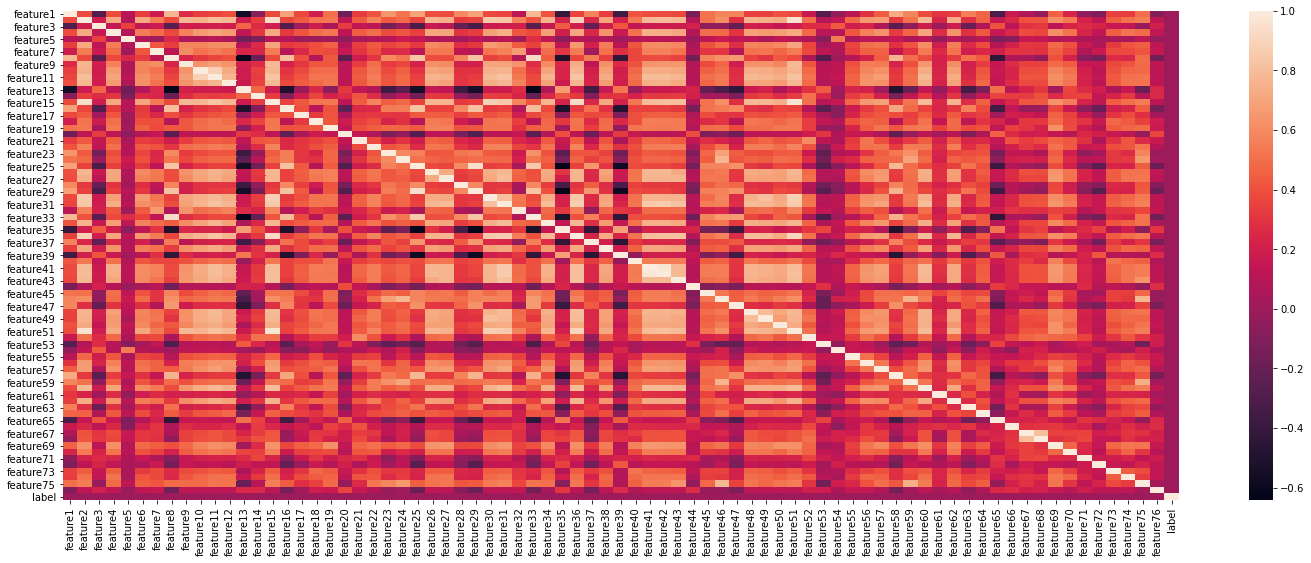

In [214]:
plt.figure(figsize = (25,9))
sns.heatmap(features_labels.corr(method='pearson',min_periods=3)) #'pearson', 'kendall', 'spearman'

In [224]:
features_labels_corr = features_labels.corr()

In [228]:
features_labels = pd.DataFrame(features_labels_corr)

In [402]:
features_labels_corr[features_labels_corr > 0.6]

In [401]:
features_labels_corr[features_labels_corr < 0.6].isna().sum()

feature1      8
feature2     28
feature3      1
feature4     24
feature5      1
             ..
feature73     1
feature74     1
feature75     5
feature76     1
label         1
Length: 77, dtype: int64

In [388]:
nan_count = features_labels_corr[features_labels_corr < 0.5].isna().sum()

In [389]:
nan_count = pd.DataFrame(nan_count)

In [390]:
nan_count.index = features_labels_corr.columns
nan_count.columns = ['features_nan_sum_more_than_0.6']

In [391]:
nan_count.shape

(77, 1)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

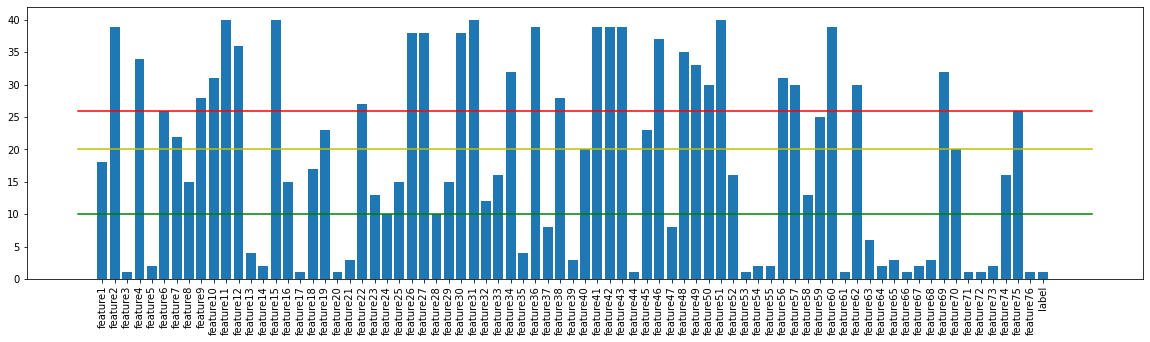

In [395]:
plt.figure(figsize = (20,5))
plt.plot([-2,80],[10,10],'g',[-2,80],[20,20],'y',[-2,80],[26,26],'r')
plt.bar(nan_count.index,nan_count['features_nan_sum_more_than_0.6'])
plt.xticks(rotation=90)

** **

**Generate training Python scripts using sklearn for each model that accepts input data, sanitizes data and outputs model + ROC curve + features importance.**


** **

** **

**Make script generic enough to work with any feature names and count (defined in external text file).**

** ** 

** **

**Generate Prediction Python script (sklearn) that accepts never seen data (no labels, just features) and uses models above to generate prediction score.**

** **